# Importations

In [223]:
import pandas as pd
import pickle as pk
import numpy as np
from sklearn.preprocessing import normalize,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve
from imblearn.over_sampling import SMOTE


# Préparation des données

#### Importation

In [224]:
data_prof = pd.read_csv('Data_Arbre.csv')

In [225]:
cols = data_prof.columns
# cols

In [226]:
categorielle = ["clc_quartier","clc_secteur","fk_stadedev","fk_port","fk_pied","fk_situation","fk_nomtech","villeca","feuillage"]
numerique = ["longitude","latitude","haut_tot","haut_tronc","tronc_diam","age_estim","fk_prec_estim","clc_nbr_diag"]
binaire = ["fk_arb_etat","remarquable"]
revet = ["fk_revetement"]
# len(categorielle)+len(numerique)+len(binaire)

In [227]:
data_num = data_prof[numerique]

#### Traitement valeur numerique -> StanardScaler

In [228]:
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)

In [229]:
data_num_scaled = pd.DataFrame(data_num_scaled,columns=numerique)
# data_num_scaled = pd.DataFrame(data_num_scaled)

In [230]:
data_num_scaled

,longitude,latitude,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag
0,-0.121047,-1.027327,-0.920963,-0.46555,-1.148795,-0.968413,-0.687534,-0.279804
1,-1.427386,0.976923,0.213100,-1.02441,0.934743,0.822235,0.357548,-0.279804
2,-0.396705,-0.642658,0.051091,0.09331,0.189412,-0.200993,0.357548,-0.279804
3,0.478338,1.012295,0.699128,0.09331,0.765349,0.822235,-1.314583,-0.279804
4,0.587422,0.692942,-1.082973,-0.46555,1.104136,0.310621,-1.314583,-0.279804
...,...,...,...,...,...,...,...,...
7404,-0.762150,-0.241781,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804
7405,-0.766702,-0.243069,-1.406991,-0.46555,-1.521460,-1.582349,-1.523599,-0.279804
7406,0.129538,0.881435,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804
7407,-0.224781,-0.307587,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804


#### Valeur catégorielle -> OneHotEncoder

In [231]:
hot = OneHotEncoder(sparse_output=False)
hot_df = pd.DataFrame(hot.fit_transform(data_prof[categorielle]), columns=hot.get_feature_names_out(categorielle))

In [232]:
hot_df

,clc_quartier_HARLY,clc_quartier_OMISSY,clc_quartier_Quartier Remicourt,clc_quartier_Quartier Saint-Jean,clc_quartier_Quartier Saint-Martin - Oëstres,clc_quartier_Quartier de Neuville,clc_quartier_Quartier de l'Europe,clc_quartier_Quartier du Centre-Ville,clc_quartier_Quartier du Vermandois,clc_quartier_Quartier du faubourg d'Isle,...,fk_nomtech_TILTOM,fk_nomtech_ULMJAP,fk_nomtech_ULMMIN,fk_nomtech_ULMRES,fk_nomtech_ULMRESreb,fk_nomtech_ULMRESsap,villeca_CASQ,villeca_VILLE,feuillage_Conifère,feuillage_Feuillu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7406,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Données booléen -> passage manuel à 0 ou 1 en fct des besoins

In [233]:
data_bin = data_prof[binaire]

#Essouche ou non
data_bin.loc[data_bin["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
data_bin.loc[data_bin["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
data_bin.fk_arb_etat = data_bin.fk_arb_etat.astype(int)
# data_bin.fk_arb_etat.value_counts()


#Remarquable ou non
data_bin.loc[data_bin["remarquable"] == "Oui", "remarquable"] = 1
data_bin.loc[data_bin["remarquable"] != 1, "remarquable"] = 0
data_bin.remarquable = data_bin.remarquable.astype(int)

C:\Users\thile\AppData\Local\Temp\ipykernel_3608\2158143917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bin.loc[data_bin["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
C:\Users\thile\AppData\Local\Temp\ipykernel_3608\2158143917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bin.loc[data_bin["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
C:\Users\thile\AppData\Local\Temp\ipykernel_3608\2158143917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [234]:
data_bin

,fk_arb_etat,remarquable
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
7404,0,0
7405,0,0
7406,0,0
7407,0,0


Rassemblement des données

In [235]:
data = pd.concat([data_num_scaled, hot_df, data_bin],axis=1)

In [236]:
data

,longitude,latitude,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag,clc_quartier_HARLY,clc_quartier_OMISSY,...,fk_nomtech_ULMMIN,fk_nomtech_ULMRES,fk_nomtech_ULMRESreb,fk_nomtech_ULMRESsap,villeca_CASQ,villeca_VILLE,feuillage_Conifère,feuillage_Feuillu,fk_arb_etat,remarquable
0,-0.121047,-1.027327,-0.920963,-0.46555,-1.148795,-0.968413,-0.687534,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
1,-1.427386,0.976923,0.213100,-1.02441,0.934743,0.822235,0.357548,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
2,-0.396705,-0.642658,0.051091,0.09331,0.189412,-0.200993,0.357548,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
3,0.478338,1.012295,0.699128,0.09331,0.765349,0.822235,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.587422,0.692942,-1.082973,-0.46555,1.104136,0.310621,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,-0.762150,-0.241781,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
7405,-0.766702,-0.243069,-1.406991,-0.46555,-1.521460,-1.582349,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
7406,0.129538,0.881435,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
7407,-0.224781,-0.307587,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0


#### Division en base de train et test

In [237]:
X_data = data.drop("fk_arb_etat",axis=1)
X_data.columns = X_data.columns.astype(str)
Y_data = data["fk_arb_etat"]
# Y_data = data.drop()
# print(X_data)
print(Y_data)

0       0
1       0
2       0
3       0
4       1
       ..
7404    0
7405    0
7406    0
7407    0
7408    0
Name: fk_arb_etat, Length: 7409, dtype: int32


In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=42,stratify=Y_data)

In [239]:
# #Smote ?
# sm = SMOTE(random_state=42, n_jobs=-1, sampling_strategy=0.25)
# # sm = SMOTE(random_state=42, n_jobs=-1)
# X_train, Y_train = sm.fit_resample(X_train, Y_train)

# Création du modèle -> RandomForestClassifier

#### Premier modèle avec toutes les features

In [240]:
forest = RandomForestClassifier(n_estimators=250,random_state=42)
forest.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=250, random_state=42)

#### GridSearch

##### CV Search

##### Test

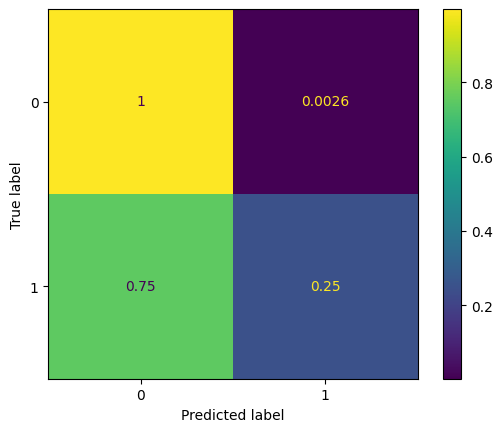

In [241]:
pred_val = cross_val_predict(forest,X_train,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  forest.classes_)
disp.plot()

#### Feature selection

In [177]:
feature_names = X_train.columns
# feature_importance_df = pd.DataFrame([])
# feature_importance_df.sort_values(by=0,axis=1,ascending=False,inplace=True)

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': forest.feature_importances_})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# feature_importance_df
# feature_names

                      Feature  Importance
0                   longitude    0.140290
1                    latitude    0.133361
4                  tronc_diam    0.118486
2                    haut_tot    0.084505
3                  haut_tronc    0.068847
..                        ...         ...
399      fk_nomtech_MALDOMmel    0.000000
443     fk_nomtech_PRUDOMrei1    0.000000
181  clc_secteur_Rue Pontoile    0.000000
174     clc_secteur_Rue Joule    0.000000
433      fk_nomtech_PRUCERbig    0.000000

[512 rows x 2 columns]


In [178]:
top_features = feature_importance_df['Feature'][:20].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


In [179]:
X_train_selected
# X_test_selected

,longitude,latitude,tronc_diam,haut_tot,haut_tronc,age_estim,clc_nbr_diag,fk_prec_estim,clc_secteur_Cimetière Sud,fk_situation_Groupe,fk_nomtech_SORAUC,fk_situation_Isolé,fk_nomtech_ACEPLA,clc_secteur_Bibliothèque Guy de Maupassant,fk_nomtech_CUPLEY,fk_situation_Alignement,clc_secteur_Square Albert Thomas,clc_secteur_Rue Berthollet,fk_port_semi libre,clc_secteur_Rue Geoffroy Saint-Hilaire
3616,0.356074,0.841543,-0.420403,0.051091,-0.465550,-0.200993,-0.279804,0.357548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6086,1.236501,-0.487583,0.680653,1.995200,0.652169,0.310621,-0.279804,0.357548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5572,0.793172,-0.729972,2.289889,1.833191,-0.465550,1.333848,-0.279804,0.357548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3206,0.720752,1.091144,0.460441,0.213100,0.093310,0.310621,-0.279804,0.357548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2716,0.256067,-1.147904,-1.267370,-0.920963,0.093310,-0.712606,-0.279804,0.357548,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,0.806326,0.445009,-0.589797,-1.082973,-0.465550,-0.712606,-0.279804,-0.687534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
72,-1.587913,-0.632020,0.934743,0.213100,0.652169,0.822235,2.334405,0.357548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4475,-0.184065,1.262788,-1.436763,-0.920963,0.093310,-1.480027,-0.279804,-1.732615,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
115,-0.050813,-0.134272,2.628675,1.995200,4.005328,4.915144,4.948615,4.537875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Featured model

In [180]:
feat_forest = RandomForestClassifier(n_estimators=250,random_state=42,n_jobs=-1)
feat_forest.fit(X_train_selected,Y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

##### Test d'accuary et matrice de confusion

Test de validation

In [181]:
pred = cross_val_score(feat_forest,X_train_selected,Y_train,cv=5,n_jobs=-1)
pred.mean()

0.9793670789646287

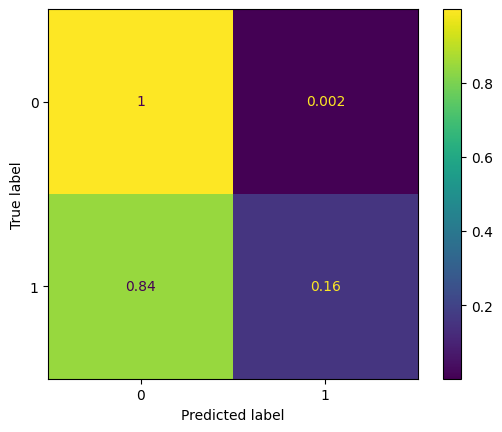

In [182]:
pred_val = cross_val_predict(feat_forest,X_train_selected,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  feat_forest.classes_)
disp.plot()

In [183]:
# print(X_train_selected.shape)
# print(Y_train.shape)

#### SMOTE

In [184]:
sm = SMOTE(random_state=42, n_jobs=-1, sampling_strategy=0.25)
# sm = SMOTE(random_state=42, n_jobs=-1)
X_smote, Y_smote = sm.fit_resample(X_train_selected, Y_train)

C:\Users\thile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [185]:
smoted_model = RandomForestClassifier(n_estimators=250,random_state=42,n_jobs=-1)
smoted_model.fit(X_smote,Y_smote)

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

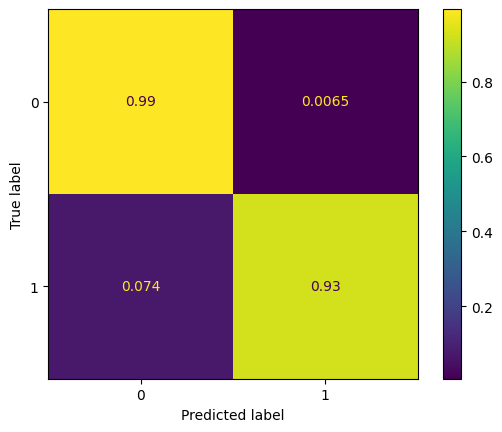

In [221]:
pred_val = cross_val_predict(smoted_model,X_smote,Y_smote,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_smote, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  smoted_model.classes_)
disp.plot()

In [222]:
pred_val = smoted_model.predict(X_test_selected)

mat  = confusion_matrix(Y_test, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  smoted_model.classes_)
disp.plot()
# plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1482, 2223]